**BELLABEAT CASE STUDY**

rška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products that informs and inspires women around the world.Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

**Business task:**

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. Apply insights to one Bellabeat product to influence bellabeat marketing strategy.

**DATA PREPARATION**

* The data was accessed from https://www.kaggle.com/arashnic/fitbit . It was obtained from survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016
* The data is a bit outdated knowing that trends evolve with time.
* The data is organized in both long and wide format.
* The data is bias has it doesn’t provide sufficient information on the users like the age, location and has only information about 33 participants; this appears to be a sampling bias. It also doesn’t provide a unit of measurement for factors like distance.
* The dataset doesn’t completely ROCCC(Reliable, Original, Current, Comprehensive,Cited . It is not current and hasn’t been updated recently, it is not comprehensive.
* The dataset is incomplete, some values appear to be missing but the data can still be worked with as those values are not a major determinant to the business task

The data was downloaded as a CSV file. The dataset is a large one and spreadsheets don't work well with large datasets as it takes alot of time to process large data. SQL or R were the best options, I chose to use R out of preference. R studio was used for data cleaning, analysis and visualizations. Tableau could substitute for the visuals but i choose R to keep my work in one space.

**PROCESS**

The files were uploaded to R studio and the following packages were installed before working with the data; dplyr, lubridate, tidyverse, janitor, ggplot2

In [1]:
install.packages("tidyverse")
library(tidyverse)
install.packages("dplyr")
library(dplyr)
install.packages("lubridate")
library(lubridate)
install.packages("janitor")
library(janitor)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following obje

On inspecting the datasets, not all the datset seemed relevant to the business task while some of the datsets appeared to be repetitions. Only the relevant datasets were loaded as dataframes and worked with.

In [2]:
daily_activity <- read_csv("../input/fitabase-data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

sleep_day <-read_csv("../input/fitabase-data/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
 
weight_log <-read_csv("../input/fitabase-data/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

Viewing our data

In [3]:
head(daily_activity)
head(weight_log)
head(sleep_day)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


We can see that the column names are not formatted properly. For ease, its best we clean up the names. We can use the clean_names() function to do this. We also observe that the date columns are not properly named, using the rename() function, this will be corrected as well. Lastly, we will sort the columns by id and store this clean data into a new data frame with an underscore c.

In [4]:
#cleaning column names and renaming date columns to date. Storing cleaned data into a new dataframe
daily_activity_c<- daily_activity %>% 
  clean_names() %>% 
  rename(date = activity_date, total_calories= calories) %>%  
  arrange(id)

sleep_day_c<- sleep_day %>% 
  clean_names() %>% 
  rename(date = sleep_day) %>% 
  arrange(id)


weight_log_c <- weight_log %>% 
  clean_names() %>% 
  arrange(id)

Lets view the changes made to our data

In [5]:
head(daily_activity_c)
head(weight_log_c)
head(sleep_day_c)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


To view the structure of our data to ensure the column data is well formatted.

In [6]:
str(daily_activity_c)
str(sleep_day_c)
str(weight_log_c)

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                        : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                      : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num 

We can see the date columns are not in the right format. They are formatted as character columns instead of date. We can resolve this by using the as.Date() function to convert appropriately.

In [7]:
#coverting date columns to date format
daily_activity_c$date<-as.Date(daily_activity_c$date, format="%m/%d/%Y")

sleep_day_c$date<-as.Date(sleep_day_c$date, format="%m/%d/%Y")

weight_log_c$date<-as.Date(weight_log_c$date, format="%m/%d/%Y")

To view the changes made

In [8]:
str(daily_activity_c)
str(sleep_day_c)
str(weight_log_c)

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                        : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                      : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num [1:940] 328 2

The columns are now formatted as Dates. Note that even our datetime column was converted to date format because for this analysis, the date is of interest. Let us view the data again.

In [9]:
head(daily_activity_c)
head(sleep_day_c)
head(weight_log_c)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12


**ANALYZING DATA**

To check the number of participants and the total number of days data was collected for

In [10]:
#to check the number of participants 
daily_activity_c%>% 
summarize(no_of_participants = n_distinct(id), total_no_days = n_distinct(date))

no_of_participants,total_no_days
<int>,<int>
33,31


It can be seen that data was collected for 33 participants for a total number of 31 days(1 month).

To see how many days out of 31 participants were active for, and to also calculate the average number of active days.

In [11]:
daily_info <- count(daily_activity_c, id)
View(daily_info)

mean = mean(daily_info$n)
print(paste(mean, 'is the average number of active days'))

id,n
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


[1] "28.4848484848485 is the average number of active days"


This shows us a larger fraction of the users were actively involved

Merging sleepday and daily acivity to closely observe trends

In [12]:
merged_daily<- merge(daily_activity_c,sleep_day_c, by=c('id', 'date'))
head(merged_daily)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


Extracting the weekdays from the date.

In [13]:
merged_daily_summary<- merged_daily %>% 
  mutate(weekdays = weekdays(date))
head(merged_daily_summary)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekdays
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,Wednesday
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,Sunday
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,Tuesday


We can check our data to ensure that the data was collected for daily activity with a total of 24 hrs(1440 minutes)

In [14]:
merged_daily_validate<- merged_daily%>% 
summarise(id, date, total_minutes <- very_active_minutes+fairly_active_minutes+
          lightly_active_minutes+sedentary_minutes+total_time_in_bed)
head(merged_daily_validate)
summary(merged_daily_validate)

,id,date,total_minutes <- ...
,<dbl>,<date>,<dbl>
1,1503960366,2016-04-12,1440
2,1503960366,2016-04-13,1440
3,1503960366,2016-04-15,1440
4,1503960366,2016-04-16,1407
5,1503960366,2016-04-17,1473
6,1503960366,2016-04-19,1440


       id                 date            total_minutes <- ...
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   : 323        
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.:1426        
 Median :4.703e+09   Median :2016-04-27   Median :1440        
 Mean   :5.001e+09   Mean   :2016-04-26   Mean   :1431        
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1466        
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :1799        

It can be seen that the daily activities were not exactly recorded all through the day, as data was collected for less than 1440 minutes in some cases. This shows a limitation to the data collected.

Checking the sleep records to observe how often sleep time was recorded for users

In [15]:
#Number of sleep records
sleep_records <- merged_daily_summary %>%
count(total_sleep_records)
View(sleep_records)

total_sleep_records,n
<dbl>,<int>
1,367
2,43
3,3


There was no proper record of sleep as most users recorded their sleep time just once. This data can only be used to make assumptions on their sleep pattern.

We can check the maximum and minimum sleep time for users

In [16]:
max(merged_daily_summary$total_minutes_asleep)

[1] 796

In [17]:
min(merged_daily_summary$total_minutes_asleep)

[1] 58

We can retrieve the information about when the max and min sleep time occurs.

In [18]:
filter(merged_daily_summary, total_minutes_asleep == 796)
filter(merged_daily_summary, total_minutes_asleep == 58)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekdays
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1644430081,2016-05-02,3758,2.73,2.73,0,0.07,0.31,2.35,0,1,7,148,682,2580,1,796,961,Monday


id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekdays
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7007744171,2016-05-01,5600,3.75,3.75,0,0,0,3.75,0,0,0,237,1142,2225,1,58,61,Sunday


Moday had the longest duration of sleep with the least actvity and less steps taken while Sunday had the least duration of sleep with more activity and total steps taken. It is observed that the user with more activity slept less than the user with less activity.

From basic research, the recommended hours of sleep for the average healthy person is 7(420 minutes) to 9 hours(540 minutes). We can check how many times people had between 7 to 9 hours of sleep

In [19]:
count(merged_daily_summary, total_minutes_asleep >= 420 & total_minutes_asleep <= 540)

total_minutes_asleep >= 420 & total_minutes_asleep <= 540,n
<lgl>,<int>
FALSE,221
TRUE,192


we can also check how many times people had less than 7 hours of sleep and more than 9 hours of sleep

In [20]:
count(merged_daily_summary, total_minutes_asleep < 420)
count(merged_daily_summary, total_minutes_asleep > 540)

total_minutes_asleep < 420,n
<lgl>,<int>
FALSE,231
TRUE,182


total_minutes_asleep > 540,n
<lgl>,<int>
FALSE,374
TRUE,39


Checking to see if there is a correlation between the total time spent in bed and the total minutes asleep to see if the time spent in bed influences the duration of sleep.

In [21]:
merged_daily_summary %>%
summarize(cor(total_time_in_bed, total_minutes_asleep))

"cor(total_time_in_bed, total_minutes_asleep)"
<dbl>
0.9304575


The correlation is very close to 1, this shows a close relationship exists between the time spent in bed and the duration of sleep. It is safe to say that the more time users spent in bed, the longer the duration of sleep they had.

To check for the maximum and minimum steps taken inorder to check for the most active day and less active day assuming the days with the most steps taken are the most active and vice versa

In [22]:
max_step <- max(merged_daily_summary$total_steps)
print(paste(max_step, 'is the maximum total steps taken'))

min_step <- min(merged_daily_summary$total_steps)
print(paste(min_step, 'is the minimum total steps taken'))

[1] "22770 is the maximum total steps taken"
[1] "17 is the minimum total steps taken"


Checking the days in which these values occur

In [23]:
filter(merged_daily_summary, total_steps == 22770)
filter(merged_daily_summary, total_steps == 17)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekdays
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4388161847,2016-05-07,22770,17.54,17.54,0,9.45,2.77,5.33,0,120,56,260,508,4022,1,472,496,Saturday


id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekdays
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4319703577,2016-05-12,17,0.01,0.01,0,0,0,0.01,0,0,0,2,0,257,1,302,321,Thursday


It can be observed that Saturdays are the most active days and Thursdays are the least active days. It can also be observed that the day with the highest total steps had the highest calories burned and vice versa. So it is safe to say that users who took more steps burned more calories than users who took less steps.

Checking weight log information to see how many users actively entered in their weights

In [24]:
#weight log
weight_info<- count(weight_log_c, id)
View(weight_info)

id,n
<dbl>,<int>
1503960366,2
1927972279,1
2873212765,2
4319703577,2
4558609924,5
5577150313,1
6962181067,30
8877689391,24


The weight information shows that only two persons were a bit consistent in entering their weight information daily.

**SUMMARY OF ANALYSIS**

* Data was obtained through survey.
* The data was cleaned before analysis; the column names and date were formatted properly inorder to avoid errors when working with the data.
* Though it was observed that there were missing values in the data but these values were not relevant in solving the business task so it was ignored.

The data was insufficient and had limitations to make concrete conclusions but from the available data given, the following conclusions were drawn from analysis:

* The data was collected for 33 participants who were actively involved for an average of 28 days out of 31 days
* Users did not consistently record their activities for all the hours of the day, some users had a total record of less than 1440 minutes(24 hours).
* Smart device users wear their devices to sleep very less often or log in sleep activity very less often, hence, there is insufficient record of sleeping pattern. However, from available data, it was seen that users had less of the recommended hours of sleep more often, this might be due to their activities during the day. Although there seems to be an outlier in the data; total number of minutes asleep. A particular user was recorded to have slept for 13 hours, this doesn't seem logical.
* A close relationship exists between the time spent in bed and the duration of sleep. Users tend to spend less time in bed and that led to less sleep time, this could have led to the results of the previous analysis on sleep hours.This can probably be due to their more acive minutes in the day. The more time they spent on their activities, the less time they spent in bed and the less sleep hours they had.
* It was also observed that users who took more steps burned more calories than users who took less steps.The most active day was Saturday while the least active day was Thursday
* The weight information shows that only two persons were a bit consistent in entering their weight information daily. It could be that the other users didn't understand the importance of keeping track of this information or they couldn't make the time to enter this information.


From analysis, I was able to gather insights that related to the business task. Trends and relationships were observed as to how costumers use their smart devices and limitations. These insights can help bellabeat improve on its own device and some of these limitations or challenges experienced and further improve on its marketing strategy.

**SHARING DATA**

Visualizations were made using Rstudio to support findings from analysis. Scatter plots were used all through to show the relationship between certain variables.

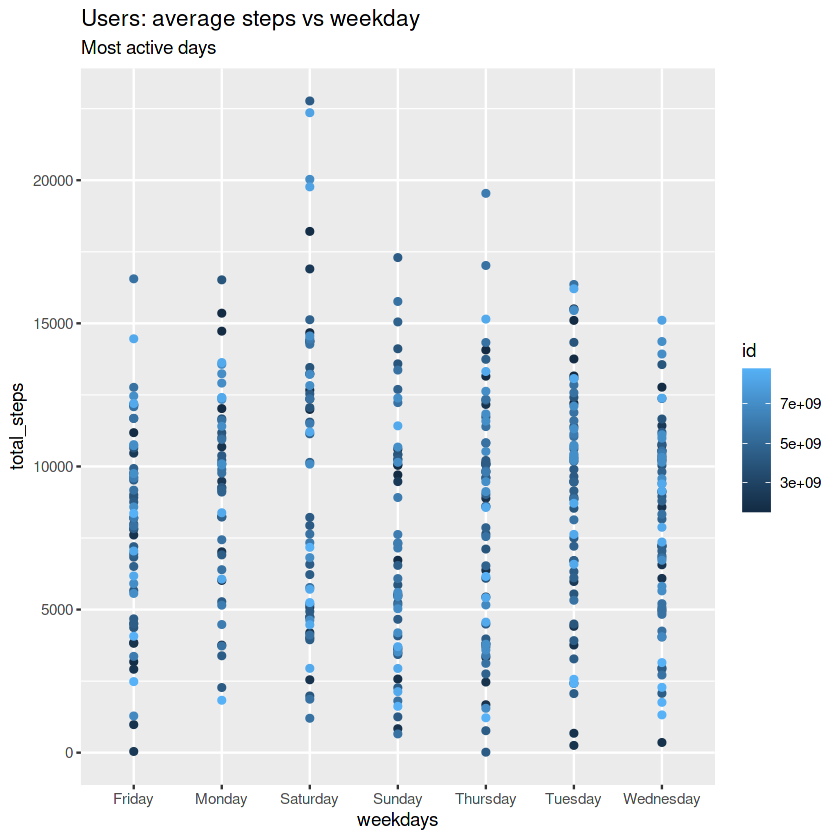

In [25]:
#to check the most active weekday
ggplot(merged_daily_summary, mapping=aes(x = weekdays, y = total_steps, color = id))+
  geom_point()+
labs(title = 'Users: average steps vs weekday', 
     subtitle = 'Most active days')

Saturdays were the most active days for users.

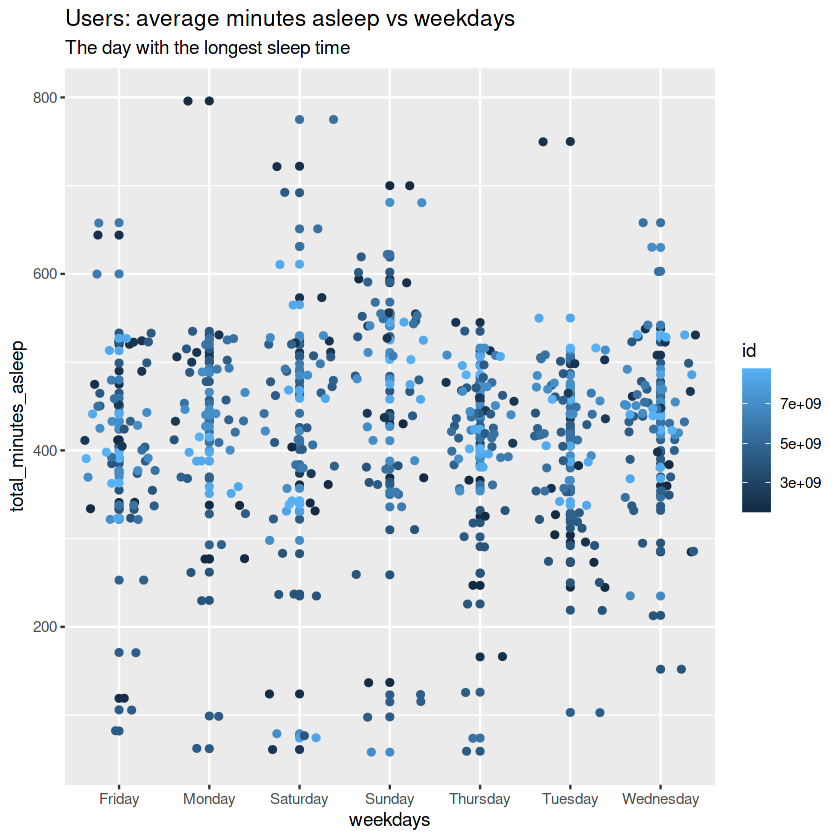

In [26]:
#the weekday with the longest sleep duration
ggplot(merged_daily_summary, mapping=aes(x = weekdays, y = total_minutes_asleep, color = id))+ 
  geom_point()+ geom_jitter()+
  labs(title = 'Users: average minutes asleep vs weekdays',
     subtitle ="The day with the longest sleep time")

The plot shows, user had the longest sleep duration on Monday.

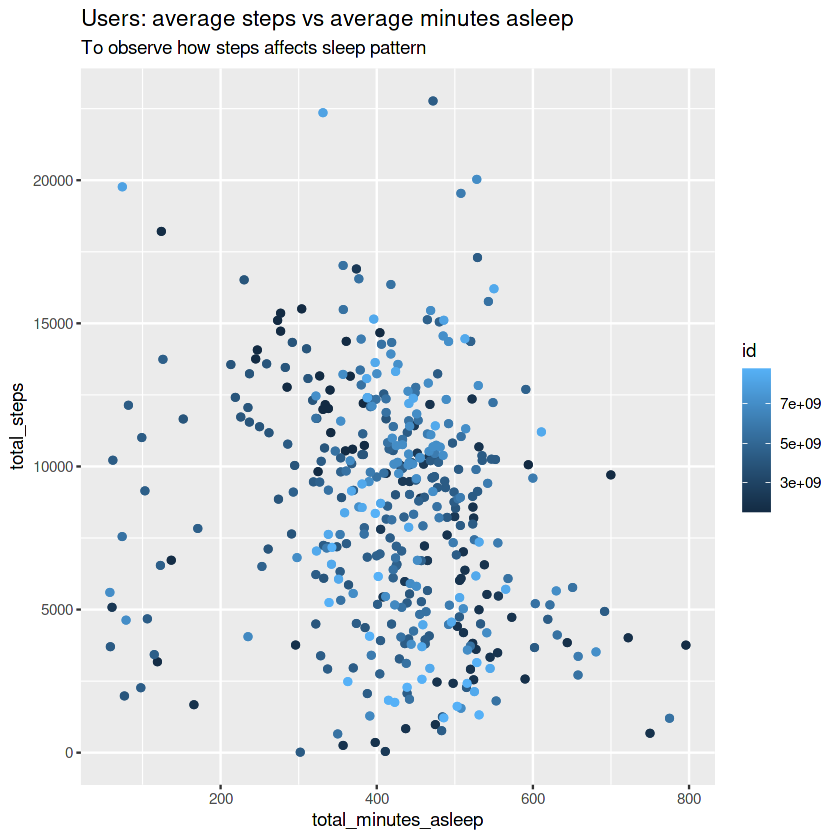

In [27]:
#how steps affect sleep duration
ggplot(merged_daily_summary, mapping=aes(x = total_minutes_asleep, y = total_steps, color= id))+ 
  geom_point()+ geom_jitter()+
  labs(title = 'Users: average steps vs average minutes asleep',
       subtitle ="To observe how steps affects sleep pattern")

Users who took less steps slept longer than users who took more steps.

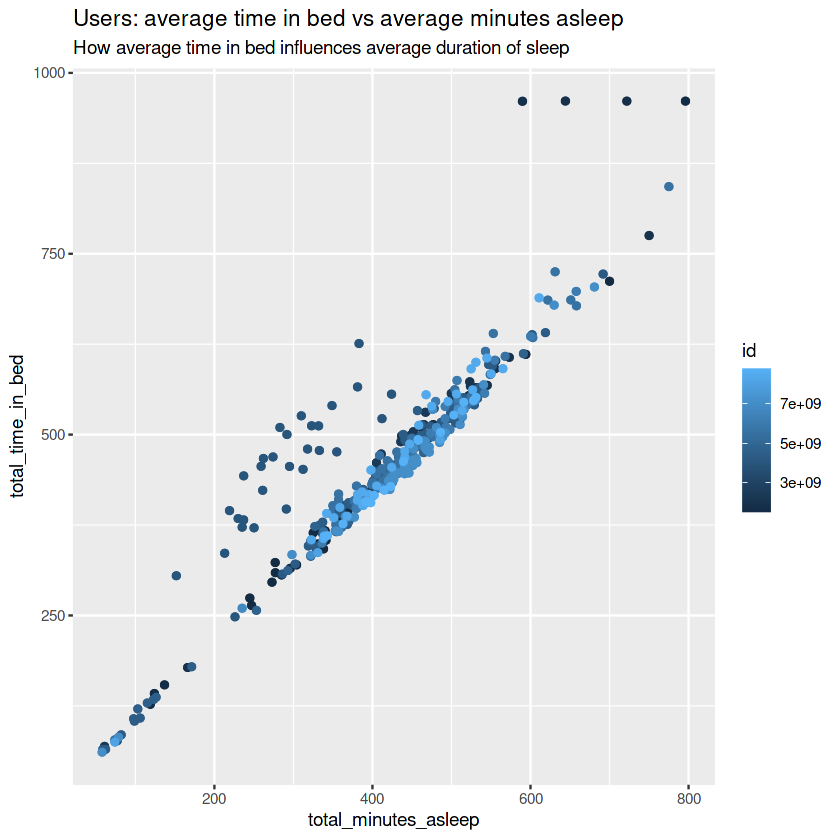

In [28]:
#correlation between time in bed and minutes asleep
ggplot(merged_daily_summary, mapping=aes(x = total_minutes_asleep, y = total_time_in_bed, color = id))+ 
  geom_point()+ geom_jitter()+
  labs(title = 'Users: average time in bed vs average minutes asleep',
       subtitle ="How average time in bed influences average duration of sleep")

The plot demonstrates a strong relationship between total time in bed and total minutes asleep. It shows that users who spent more time in bed slept longer than users who did not.

**RECOMMENDATIONS**

Based on the conclusions from my analysis, these are my recommendations for bellabeat app

* From observation, it was seen that users had poor sleping habit which isn't quite healthy. More activity led to less time in bed which also led to less sleep time; this could probably be as result of time imbalance. Bellabeat could design their app in a way that helps users manage this, for example, the app could be designed to create notifications for sleep time and recommend sleep durations.
* More users seemed to be less active and the lesser the activity, the lesser the calories burned. The app can have features that enable users set target fitness activity daily, be notified to begin activity and be notified when a daily activity has been completed or is lagging.
* The app could give users the opportunity to sign in at the beginning of daily activity and sign out at the end, so it could monitor and record appropriate data for the usage duration daily. It could also give users a daily notification of how much calories is being lost to encourage users to keep the momentum.
* There should be a proper tracking of weight monthly as this helps users know their progress, the users can either be notified to fill their weight info or the app could be programmed to calculate the weight based on records of their daily activity and calories lost. This can be done monthly preferably.
* Furthermore, bellabeat app should be designed in a way that it is simple to use for all age group. The more easy it is to use, the better costumers are able to use it.
* It is important for bellabeat to maximize their ads to educate users and potential users on the benefit of the app which comes from appropriate usage and how best to use it, otherwise, bellabeat might upgrade all the features of its app and users might still not see the advantage or use it to the fullest potential.
* Lastly, I would also recommend the app be designed to collect information like age, gender, lifestyle, preference, height and weight (with appropriate unit of measurements), when filling registration details, this information can also be collected during membership registration. For future analysis, sufficient data from sufficient number of users should also be collected through surveys to aid analysis and better improvement. Bias should be avoided as this can lead to inaccurate or insufficient analysis.